In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse

# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = 'my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = 'label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL


from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "my_faster/saved_model"

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')  # Suppress Matplotlib warnings


def load_image_into_numpy_array(path):
    return np.array(Image.open(path))


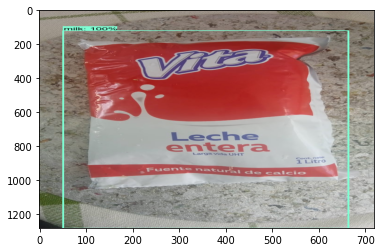

{1: {'id': 1, 'name': 'egg'}, 2: {'id': 2, 'name': 'cheese'}, 3: {'id': 3, 'name': 'milk'}, 4: {'id': 4, 'name': 'lemon'}, 5: {'id': 5, 'name': 'onion'}, 6: {'id': 6, 'name': 'garlic'}, 7: {'id': 7, 'name': 'potatoe'}, 8: {'id': 8, 'name': 'green banana'}, 9: {'id': 9, 'name': 'tomato'}, 10: {'id': 10, 'name': 'chicken'}}
[ 3  9  2  2  2 10  2  2  2  2 10 10  2  2 10  2  2 10  2  2 10  2  8 10
 10  2 10  2 10 10  2  2  2  3  2  2 10  2 10  2 10  2  6  2  3  9  8  2
 10  7 10  8 10 10 10  7  6  9  9  2  9  7  9  2  7  8  5  9 10 10  7  8
  3  7  2  7  2  2  7  7  8 10 10  3  8  9  3  8 10  8  8  9  9  8  9  2
  7 10  8  2]
[9.95707273e-01 5.26991710e-02 2.70202383e-02 1.99346934e-02
 1.79729350e-02 1.25863366e-02 1.21796401e-02 8.34793597e-03
 7.09120184e-03 6.45483518e-03 5.38567314e-03 5.32302028e-03
 5.01409266e-03 3.85339069e-03 3.26947449e-03 3.24311061e-03
 2.85302638e-03 2.78493529e-03 2.62254174e-03 2.30072392e-03
 2.15450116e-03 2.01773830e-03 1.98301510e-03 1.95684889e-03
 1.9

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
IMAGE_PATHS = 'tetst31.jpeg'
image_np = load_image_into_numpy_array(IMAGE_PATHS)



    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
detections['num_detections'] = num_detections

    # detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

plt.imshow(image_np_with_detections,aspect='auto')
plt.show()

print(category_index)
print(detections['detection_classes'])
print(detections['detection_scores'])



In [ ]:
indexItems=[index for index in range(len(detections['detection_scores'])) if detections['detection_scores'][index]>=0.5]
cateogries={}
for index in indexItems:
    if 
    

In [ ]:

import matplotlib.pyplot as plt

# Define Data

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plot

plt.plot(x, y)

# Display

plt.show()